In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = sns.load_dataset("tips")
df.info()
                       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [87]:
from sklearn.model_selection import train_test_split

In [89]:
Sex = pd.get_dummies(df["sex"])
Sex

,Male,Female
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
239,True,False
240,False,True
241,True,False
242,True,False


In [91]:
Smoker = pd.get_dummies(df["smoker"])
Smoker

,Yes,No
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
239,False,True
240,True,False
241,True,False
242,False,True


In [92]:
Day = pd.get_dummies(df["day"])
Day

,Thur,Fri,Sat,Sun
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
239,False,False,True,False
240,False,False,True,False
241,False,False,True,False
242,False,False,True,False


In [93]:
Time = pd.get_dummies(df["time"])
Time

,Lunch,Dinner
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
239,False,True
240,False,True
241,False,True
242,False,True


In [94]:
df.drop(["sex","time","day","smoker"], axis =1, inplace = True)

In [95]:
df

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [96]:
df = pd.concat([df, Sex, Time, Smoker, Day], axis =1 )

In [97]:
df

,total_bill,tip,size,Male,Female,Lunch,Dinner,Yes,No,Thur,Fri,Sat,Sun
0,16.99,1.01,2,False,True,False,True,False,True,False,False,False,True
1,10.34,1.66,3,True,False,False,True,False,True,False,False,False,True
2,21.01,3.50,3,True,False,False,True,False,True,False,False,False,True
3,23.68,3.31,2,True,False,False,True,False,True,False,False,False,True
4,24.59,3.61,4,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,False,True,False,True,False,False,True,False
240,27.18,2.00,2,False,True,False,True,True,False,False,False,True,False
241,22.67,2.00,2,True,False,False,True,True,False,False,False,True,False
242,17.82,1.75,2,True,False,False,True,False,True,False,False,True,False


In [98]:
from sklearn.model_selection import train_test_split

In [100]:
x = df.drop("total_bill", axis  =1)
x

In [101]:
y = df["total_bill"]
y

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [107]:
from sklearn.svm import SVR

In [108]:
model = SVR()

In [110]:
model.fit(x_train, y_train)

SVR()

In [112]:
predicted = model.predict(x_test)
predicted 

array([18.72380318, 19.9625703 , 20.35885263, 17.00678229, 18.81276458,
       20.73228563, 14.41870645, 16.5830363 , 25.96046463, 16.86674733,
       14.1505384 , 15.57950003, 21.03958175, 20.21508561, 19.45954792,
       14.87656983, 23.89847116, 23.57633858, 13.28458414, 16.5714142 ,
       15.73203552, 21.91820094, 19.27723926, 13.64284458, 18.44270939,
       13.62854325, 13.50272957, 17.0021889 , 16.61014078, 14.3791468 ,
       14.03601004, 19.52551015, 21.03150461, 21.95102467, 15.65141174,
       16.5830363 , 13.92644389, 15.05486563, 13.19203989, 14.74146389,
       20.01294812, 13.70912149, 14.62849846, 13.70912149, 13.29007235,
       27.64109887, 27.68880838, 14.91793153, 16.76297266, 19.84411183,
       27.42708569, 12.74196676, 17.93665864, 15.67453165, 15.83428213,
       15.79886114, 12.76266849, 17.43864881, 13.07089339, 20.8484874 ,
       14.53666684, 15.19270601, 15.64851785, 23.07422571, 19.03335493,
       17.17021284, 26.61784562, 23.84848241, 14.14361536, 22.02

In [113]:
y_test

55     19.49
15     21.58
20     17.92
38     18.69
71     17.07
       ...  
187    30.46
25     17.81
144    16.43
86     13.03
97     12.03
Name: total_bill, Length: 74, dtype: float64

In [122]:
from sklearn import metrics

In [124]:
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)))

5.988027824689281


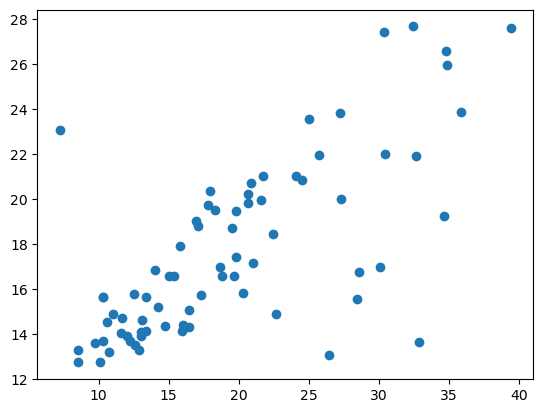

In [125]:
plt.scatter(y_test, predicted)